In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Planck
from scipy.constants import elementary_charge
import seaborn as sns
h = Planck
e = elementary_charge


In [2]:
file_path = 'current.csv'
data = pd.read_csv(file_path)
R_f = 1e5

In [3]:
data = data*1e-2
data

I
0     0.20
1     0.20
2     0.21
3     0.22
4     0.24
...    ...
3995  0.20
3996  0.21
3997  0.23
3998  0.22
3999  0.20

[4000 rows x 1 columns]

In [4]:
n = data.size
n

4000

In [5]:
initial = 0
final = n
time = np.arange(0,n)
time = time*1e-5
time = time[initial:final]
time

array([0.000e+00, 1.000e-05, 2.000e-05, ..., 3.997e-02, 3.998e-02,
       3.999e-02])

In [6]:
data_new = data[initial:final]
data_new = data_new/R_f
data_new

I
0     0.000002
1     0.000002
2     0.000002
3     0.000002
4     0.000002
...        ...
3995  0.000002
3996  0.000002
3997  0.000002
3998  0.000002
3999  0.000002

[4000 rows x 1 columns]

In [7]:
current = data_new

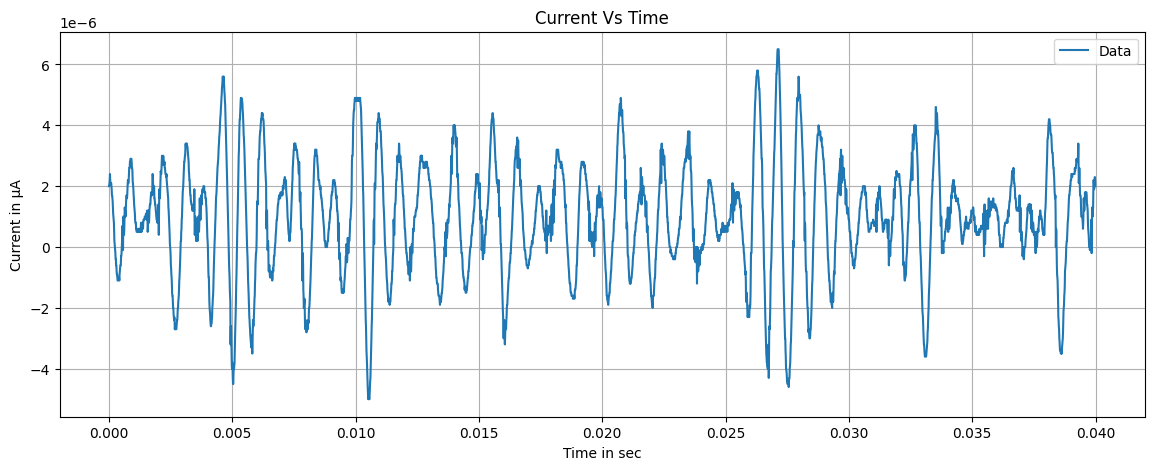

In [8]:
plt.figure(figsize=(14,5))
plt.plot(time, current, marker='', label='Data')
plt.title('Current Vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Current in \u00B5A')
plt.legend()
plt.grid(True)
plt.savefig('Current graph.png')
plt.show()


In [9]:
ste = e*e/h
ste = ste*2
ste

7.748091729863649e-05

In [10]:
v = 0.0133
conductance = current/v
steps = ste
conductance = conductance/steps

In [11]:
#conductance shift
# r = 150
# conductance = (conductance-1/r)

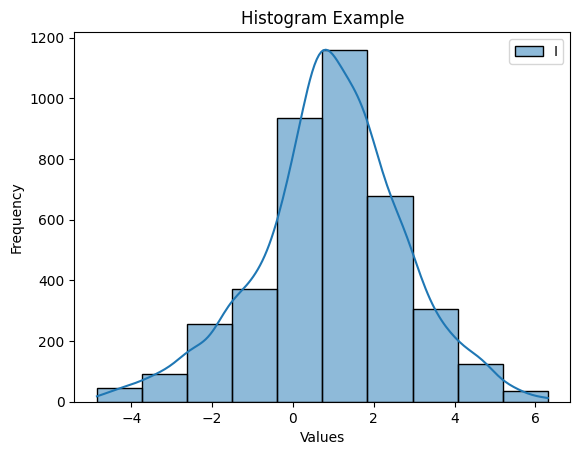

In [12]:
sns.histplot(conductance, bins=10, kde=True, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()

Text(0.5, 1.0, 'Counts vs Frequencies KDE Curve')

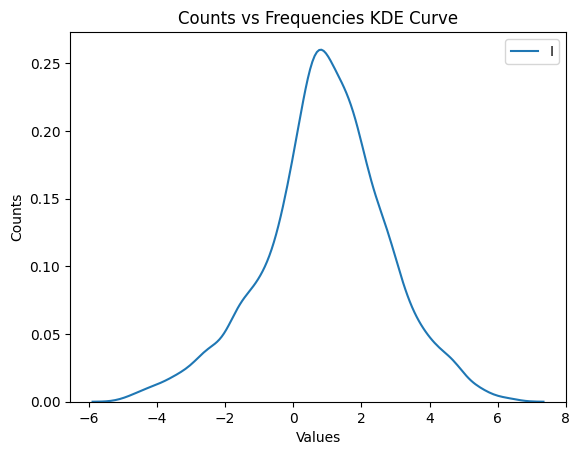

In [13]:
sns.kdeplot(conductance, color='blue', common_norm=False)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Counts vs Frequencies KDE Curve')

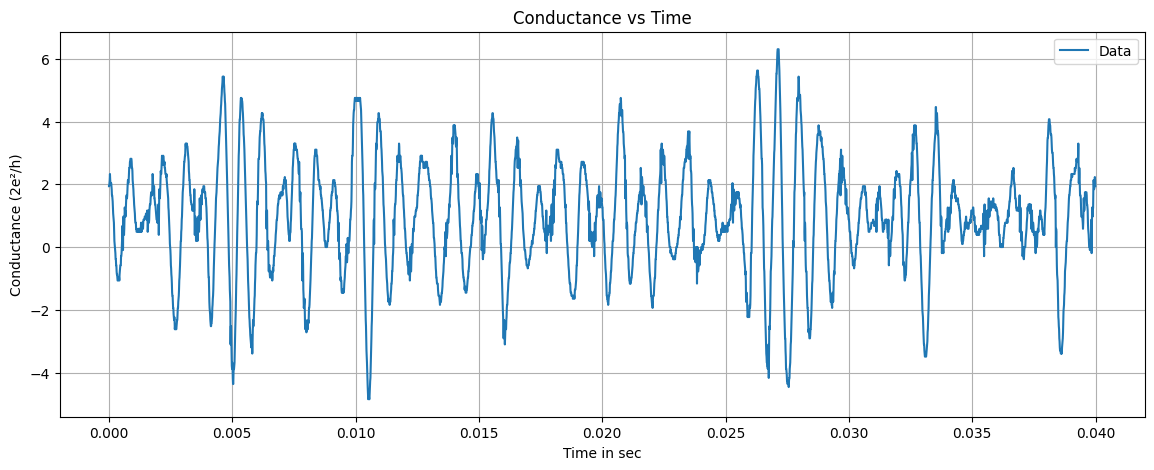

In [14]:
plt.figure(figsize=(14,5))
plt.plot(time, conductance, marker='', label='Data')
plt.title('Conductance vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Conductance (2e\u00b2/h)')
plt.legend()
plt.grid(True)
plt.savefig('conductance_graph.png')
plt.show()


In [15]:
fft_result = np.fft.fft(data_new)
frequencies = np.fft.fftfreq(len(data_new))

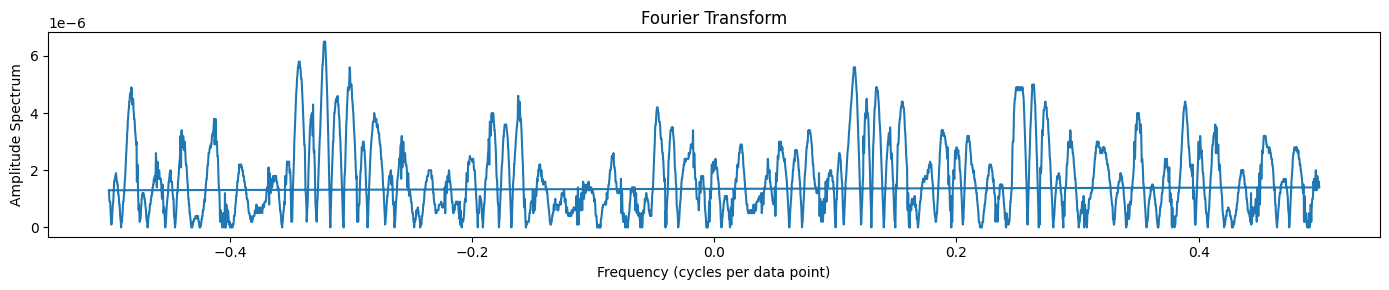

In [16]:
plt.figure(figsize=(14, 3))

plt.plot(frequencies, np.abs(fft_result), marker='')
plt.title('Fourier Transform')
plt.xlabel('Frequency (cycles per data point)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.savefig('Frequency_graph.png')
plt.show()
